<a href="https://colab.research.google.com/github/kitkit922/Machine_Learning_1/blob/main/Assignment5_TszKitCheung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Tsz Kit Cheung (Kevin) N01555831 Assignment 5

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Tsz Kit Cheung N01555831 ITE 5310 Assignment 5

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/L6/Assign05/titanic_train.csv')

In [ ]:
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


#Drop the features “ Name, Ticket and Cabin”.


In [ ]:
data.drop(['Name','Ticket','Cabin'],axis=1, inplace = True)

#convert Sex and Embarked into integers so that machine can use them.


In [ ]:
data_dummies = pd.get_dummies(data[['Sex','Embarked']],prefix = '', prefix_sep ='', drop_first=True)

In [ ]:
data2 = pd.concat([data,data_dummies], axis = 1)

In [ ]:
data2.drop(['Sex','Embarked'], axis = 1, inplace = True)

In [ ]:
null_columns = data2.columns[data2.isnull().any()]
print(null_columns)

Index(['Age'], dtype='object')


In [ ]:
mean_age = data2['Age'].mean()
data2['Age'].fillna(mean_age, inplace=True)

In [ ]:
print(data2.head())

   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0            1         0       3  22.0      1      0   7.2500     1  0  1
1            2         1       1  38.0      1      0  71.2833     0  0  0
2            3         1       3  26.0      0      0   7.9250     0  0  1
3            4         1       1  35.0      1      0  53.1000     0  0  1
4            5         0       3  35.0      0      0   8.0500     1  0  1


#Apply PCA on the features and convert them into four, three and two principal components and find the variance ratio of principal components.


# General Comparison

#four principal components

In [ ]:
X_f = data2.iloc[:,1:]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled_f = scaler.fit_transform(X_f)
X_scaled_f

array([[-0.78927234,  0.82737724, -0.5924806 , ...,  0.73769513,
        -0.30756234,  0.61930636],
       [ 1.2669898 , -1.56610693,  0.63878901, ..., -1.35557354,
        -0.30756234, -1.61470971],
       [ 1.2669898 ,  0.82737724, -0.2846632 , ..., -1.35557354,
        -0.30756234,  0.61930636],
       ...,
       [-0.78927234,  0.82737724,  0.        , ..., -1.35557354,
        -0.30756234,  0.61930636],
       [ 1.2669898 , -1.56610693, -0.2846632 , ...,  0.73769513,
        -0.30756234, -1.61470971],
       [-0.78927234,  0.82737724,  0.17706291, ...,  0.73769513,
         3.25137334, -1.61470971]])

In [ ]:
from sklearn.decomposition import PCA
pca_4 = PCA(n_components = 4)
X_pca_4 = pca_4.fit_transform(X_scaled_f)
X_pca_4

array([[-1.5116961 ,  0.68056572, -0.42511202,  0.03066798],
       [ 2.58141552, -1.08049322,  0.56714081, -0.00763363],
       [ 0.30812621,  0.30342162,  0.34340626, -2.11330528],
       ...,
       [ 0.22310825,  1.95238511, -0.29061061,  0.01312473],
       [ 1.08010461, -1.38217605,  0.43984198, -0.03679681],
       [-1.40032989, -0.90508001,  3.1664944 ,  1.41378854]])

In [ ]:
print(pca_4.explained_variance_ratio_)

[0.23882508 0.18995809 0.17624922 0.12061051]


In [ ]:
print(np.sum(pca_4.explained_variance_ratio_))

0.7256429031900004


#Three principal components

In [ ]:
pca_3 = PCA(n_components = 3)
X_pca_3 = pca_3.fit_transform(X_scaled_f)
X_pca_3

array([[-1.5116961 ,  0.68056572, -0.42511202],
       [ 2.58141552, -1.08049322,  0.56714081],
       [ 0.30812621,  0.30342162,  0.34340626],
       ...,
       [ 0.22310825,  1.95238511, -0.29061061],
       [ 1.08010461, -1.38217605,  0.43984198],
       [-1.40032989, -0.90508001,  3.1664944 ]])

In [ ]:
print(pca_3.explained_variance_ratio_)


[0.23882508 0.18995809 0.17624922]


In [ ]:
print(np.sum(pca_3.explained_variance_ratio_))

0.6050323928646488


#Two principal components

In [ ]:
pca_2 = PCA(n_components = 2)
X_pca_2 = pca_2.fit_transform(X_scaled_f)
X_pca_2

array([[-1.5116961 ,  0.68056572],
       [ 2.58141552, -1.08049322],
       [ 0.30812621,  0.30342162],
       ...,
       [ 0.22310825,  1.95238511],
       [ 1.08010461, -1.38217605],
       [-1.40032989, -0.90508001]])

In [ ]:
print(pca_2.explained_variance_ratio_)

[0.23882508 0.18995809]


In [ ]:
print(np.sum(pca_2.explained_variance_ratio_))

0.4287831716950825


#When PCA is two principal components, the value is 0.43, when PCA is three principal components, the value is 0.61, when PCA is four principal components, the value is 0.73. The PCA value is accumulative, it sum uop the smaller principal components to form the larger components.

# Perform DBSCAN clustering using two principal components

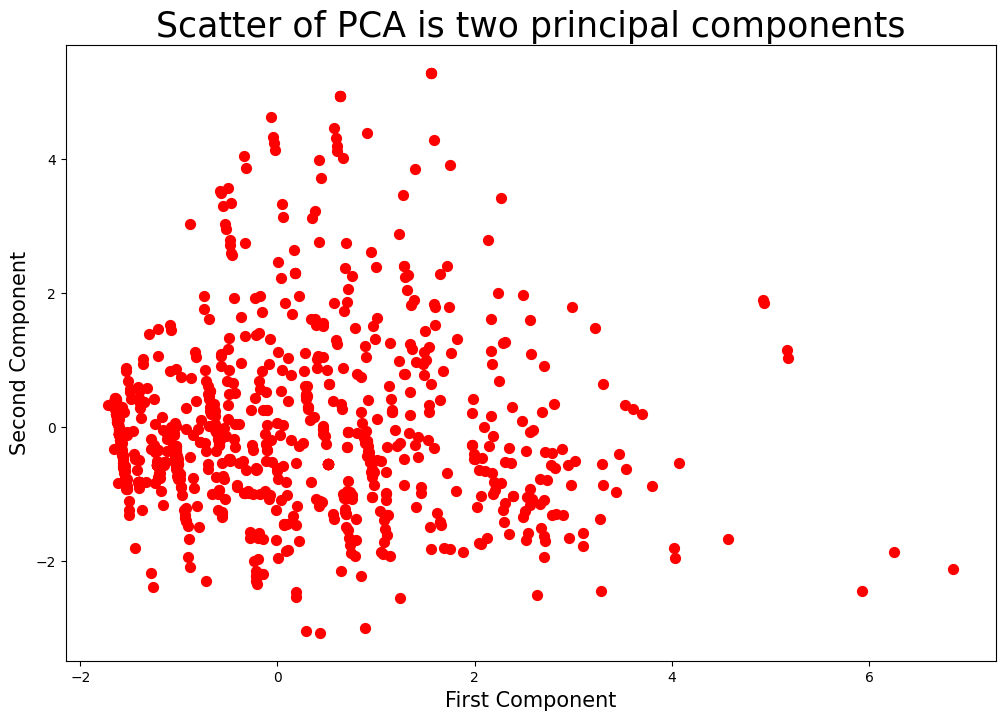

In [ ]:
plt.figure(figsize = (12,8))
plt.scatter(X_pca_2[:,0], X_pca_2[:,1], s = 50, c = 'red')
# sns.scatterplot(data = X_pca_2, x = X_pca_2[:,0], y = X_pca_2[:,1])
plt.title('Scatter of PCA is two principal components', fontsize = 25)
plt.xlabel('First Component', fontsize = 15)
plt.ylabel('Second Component', fontsize = 15)
plt.show()

#Evaluate clustering performance using CH-Index and Silhouette score. (For Epsilon 0.1 - 3 and min sample = 5)

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score

CHlist = []
SSlist = []

max_ch = 0
max_ss = 0
max_ch_n = 0
max_ss_n = 0
add_count = 0


for i in range (1,301):
  dbscan = DBSCAN(eps=i/10, min_samples = 5)
  y_dbscan = dbscan.fit_predict(X_pca_2)

  if i == 1:
    add_count = i/10

  # calinski_harabasz_score
  try:
    chscore = calinski_harabasz_score(X_pca_2,y_dbscan)
    CHlist.append(chscore)
    print(f'Calinski Harabasz Score(eps = {i/10}) : {chscore}')

    # silhouette_score
    ssscore = silhouette_score(X_pca_2,y_dbscan)
    SSlist.append(ssscore)
    print(f'Silhouette Score(eps = {i/10}) : {ssscore}')
    print('')
  except:
    pass

#find Calinski Harabasz Score max
for i, element in enumerate(CHlist):
  if element > max_ch:
    max_ch = element
    max_ch_n = i/10
print(f'Max Calinski Harabasz Score: (eps = {max_ch_n + add_count}) : {max_ch}')

#find Silhouette Score max
for i, element in enumerate(SSlist):
  if element > max_ss:
    max_ss = element
    max_ss_n = i/10
print(f'Max Silhouette Score: (eps = {max_ss_n + add_count}) : {max_ss}')

Calinski Harabasz Score(eps = 0.1) : 18.603368730074507
Silhouette Score(eps = 0.1) : -0.1421055056579817

Calinski Harabasz Score(eps = 0.2) : 47.83224917115038
Silhouette Score(eps = 0.2) : -0.04475001250296077

Calinski Harabasz Score(eps = 0.3) : 64.78827033977278
Silhouette Score(eps = 0.3) : 0.11816883049726846

Calinski Harabasz Score(eps = 0.4) : 46.79139817505199
Silhouette Score(eps = 0.4) : 0.3303830689844022

Calinski Harabasz Score(eps = 0.5) : 87.9728753864647
Silhouette Score(eps = 0.5) : 0.4957339942054209

Calinski Harabasz Score(eps = 0.6) : 78.99673769428755
Silhouette Score(eps = 0.6) : 0.5374747218794713

Calinski Harabasz Score(eps = 0.7) : 76.51364849269382
Silhouette Score(eps = 0.7) : 0.5566562608995066

Calinski Harabasz Score(eps = 0.8) : 71.83341361411918
Silhouette Score(eps = 0.8) : 0.5718317498164133

Calinski Harabasz Score(eps = 0.9) : 68.0392237054381
Silhouette Score(eps = 0.9) : 0.5780179947604227

Calinski Harabasz Score(eps = 1.0) : 61.277855823603

#Try Epsilon = 0.8, the value is near to maximum score

#Evaluate clustering performance using CH-Index and Silhouette score. (For Epsilon 0.8 and min sample = 1 - 50)

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score

CHlist = []
SSlist = []

max_ch = 0
max_ss = 0
max_ch_n = 0
max_ss_n = 0
add_count = 0


for i in range (1,51):
  dbscan = DBSCAN(eps=0.8, min_samples = i)
  y_dbscan = dbscan.fit_predict(X_pca_2)

  if i == 1:
    add_count = i

  # calinski_harabasz_score
  try:
    chscore = calinski_harabasz_score(X_pca_2,y_dbscan)
    CHlist.append(chscore)
    print(f'Calinski Harabasz Score(eps = {i}) : {chscore}')

    # silhouette_score
    ssscore = silhouette_score(X_pca_2,y_dbscan)
    SSlist.append(ssscore)
    print(f'Silhouette Score(eps = {i}) : {ssscore}')
    print('')
  except:
    pass

#find Calinski Harabasz Score max
for i, element in enumerate(CHlist):
  if element > max_ch:
    max_ch = element
    max_ch_n = i
print(f'Max Calinski Harabasz Score: (eps = {max_ch_n + add_count}) : {max_ch}')

#find Silhouette Score max
for i, element in enumerate(SSlist):
  if element > max_ss:
    max_ss = element
    max_ss_n = i
print(f'Max Silhouette Score: (eps = {max_ss_n + add_count}) : {max_ss}')

Calinski Harabasz Score(eps = 1) : 29.409803494360155
Silhouette Score(eps = 1) : 0.409945163052014

Calinski Harabasz Score(eps = 2) : 29.409803494360155
Silhouette Score(eps = 2) : 0.409945163052014

Calinski Harabasz Score(eps = 3) : 29.409803494360155
Silhouette Score(eps = 3) : 0.409945163052014

Calinski Harabasz Score(eps = 4) : 36.756577936739696
Silhouette Score(eps = 4) : 0.5399360267236051

Calinski Harabasz Score(eps = 5) : 71.83341361411918
Silhouette Score(eps = 5) : 0.5718317498164133

Calinski Harabasz Score(eps = 6) : 73.85249426623123
Silhouette Score(eps = 6) : 0.5656550675831779

Calinski Harabasz Score(eps = 7) : 75.36655723453755
Silhouette Score(eps = 7) : 0.5613620671273131

Calinski Harabasz Score(eps = 8) : 75.36655723453755
Silhouette Score(eps = 8) : 0.5613620671273131

Calinski Harabasz Score(eps = 9) : 75.36655723453755
Silhouette Score(eps = 9) : 0.5613620671273131

Calinski Harabasz Score(eps = 10) : 75.36655723453755
Silhouette Score(eps = 10) : 0.56136

# Test when Epsilon = 0.5




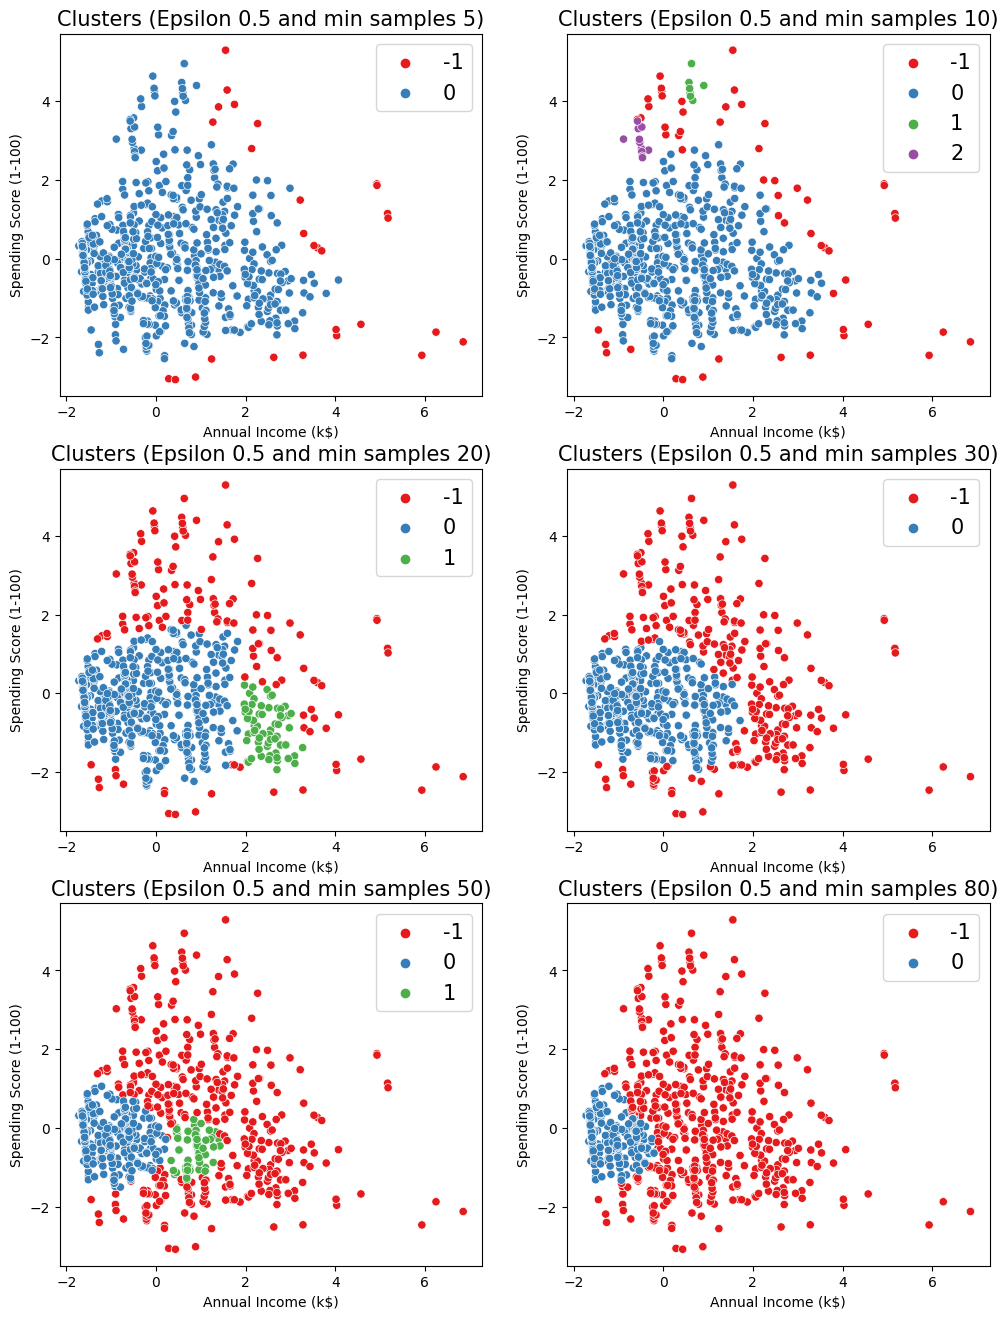

In [ ]:
from sklearn.cluster import DBSCAN
eps_value = 0.5
test_samples = [5,10,20,30,50,80]
len_test_samples = len(test_samples)
plot_x = int(len_test_samples/2)
plot_y = int(len(test_samples)/plot_x)

fig,ax = plt.subplots(plot_x,plot_y,figsize=(12,16))
colorArray = [
    (0.2, 0.4, 0.6),
    (0.8, 0.1, 0.3),
    (0.5, 0.7, 0.2),
    (0.9, 0.5, 0.1),
    (0.3, 0.6, 0.9),
    (0.7, 0.2, 0.8),
    (0.1, 0.9, 0.4),
    (0.4, 0.8, 0.7),
    (0.6, 0.3, 0.5),
    (0.2, 0.5, 0.8)
]
for i in range(len_test_samples):
  row = i // plot_y
  col = i % plot_y
  dbscan = DBSCAN(eps=eps_value, min_samples = test_samples[i])
  y_dbscan = dbscan.fit_predict(X_pca_2)
  sns.scatterplot(data = X_pca_2, x = X_pca_2[:,0], y = X_pca_2[:,1], hue = y_dbscan, palette = 'Set1', ax=ax[row, col])
  ax[row, col].set_title(f'Clusters (Epsilon {eps_value} and min samples {test_samples[i]})', fontsize = 15)
  ax[row, col].set_xlabel('Annual Income (k$)', fontsize = 10)
  ax[row, col].set_ylabel('Spending Score (1-100)', fontsize = 10)
  ax[row, col].legend(fontsize = 15)
plt.show()

#Test when Epsilon = 0.8

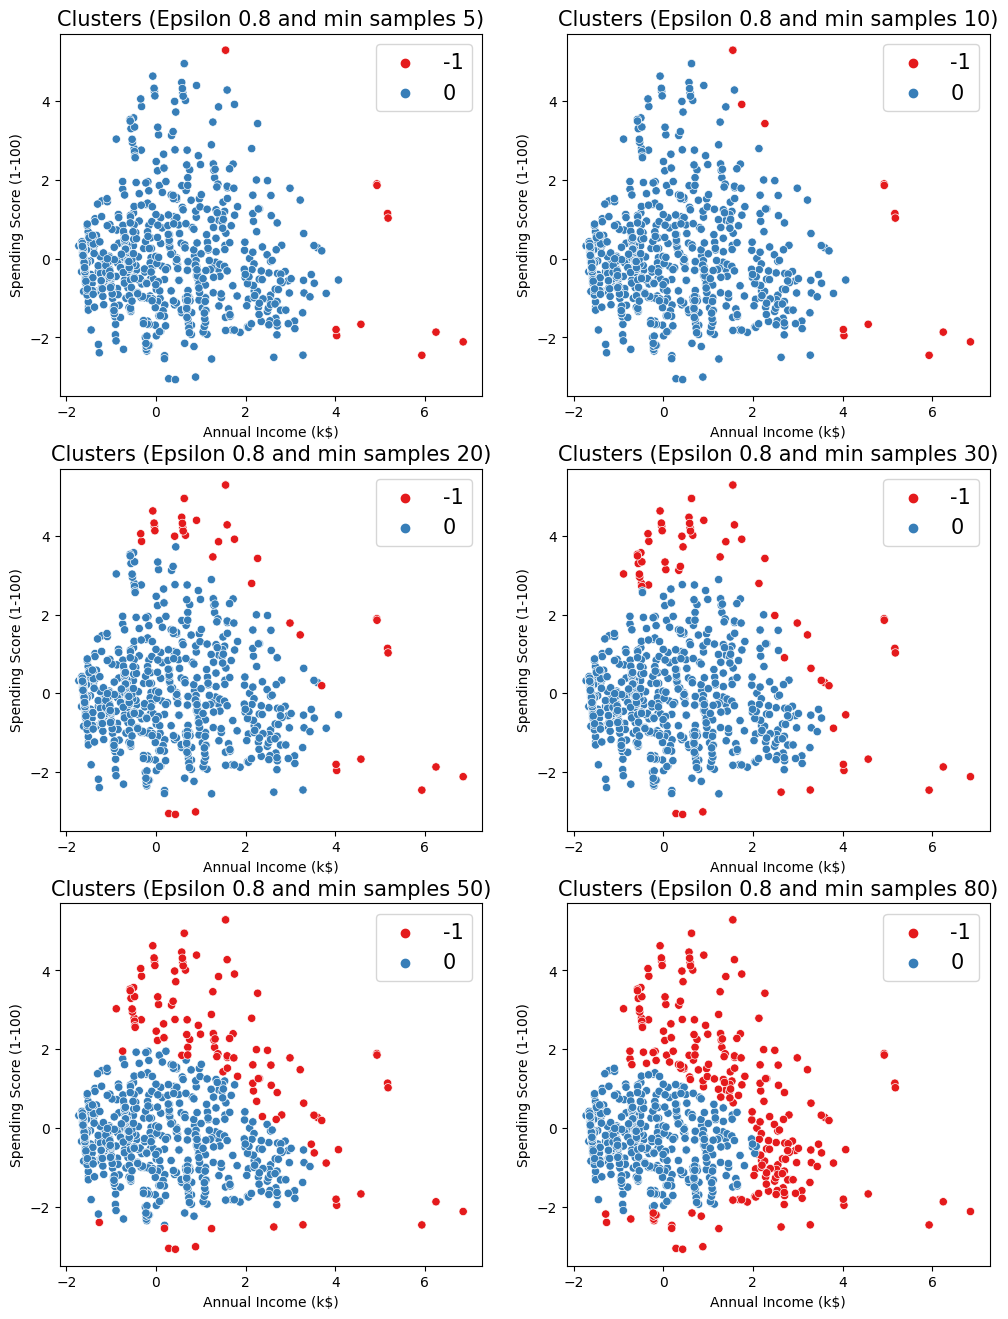

In [ ]:
from sklearn.cluster import DBSCAN
eps_value = 0.8
test_samples = [5,10,20,30,50,80]
len_test_samples = len(test_samples)
plot_x = int(len_test_samples/2)
plot_y = int(len(test_samples)/plot_x)

fig,ax = plt.subplots(plot_x,plot_y,figsize=(12,16))
colorArray = [
    (0.2, 0.4, 0.6),
    (0.8, 0.1, 0.3),
    (0.5, 0.7, 0.2),
    (0.9, 0.5, 0.1),
    (0.3, 0.6, 0.9),
    (0.7, 0.2, 0.8),
    (0.1, 0.9, 0.4),
    (0.4, 0.8, 0.7),
    (0.6, 0.3, 0.5),
    (0.2, 0.5, 0.8)
]
for i in range(len_test_samples):
  row = i // plot_y
  col = i % plot_y
  dbscan = DBSCAN(eps=eps_value, min_samples = test_samples[i])
  y_dbscan = dbscan.fit_predict(X_pca_2)
  sns.scatterplot(data = X_pca_2, x = X_pca_2[:,0], y = X_pca_2[:,1], hue = y_dbscan, palette = 'Set1', ax=ax[row, col])
  ax[row, col].set_title(f'Clusters (Epsilon {eps_value} and min samples {test_samples[i]})', fontsize = 15)
  ax[row, col].set_xlabel('Annual Income (k$)', fontsize = 10)
  ax[row, col].set_ylabel('Spending Score (1-100)', fontsize = 10)
  ax[row, col].legend(fontsize = 15)
plt.show()

#Test when Epsilon = 1.2

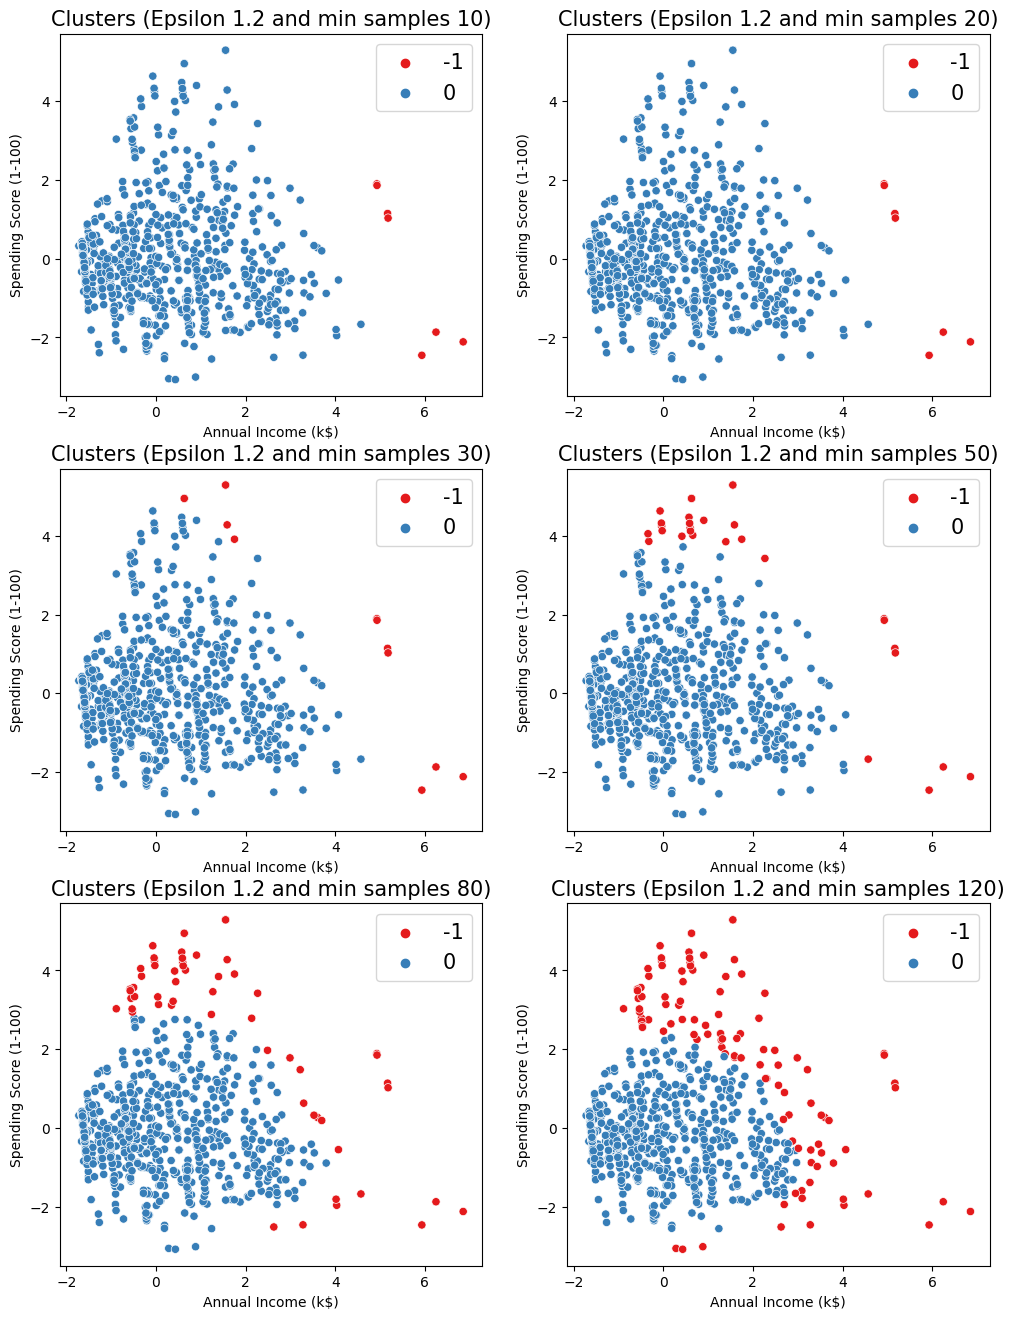

In [ ]:
from sklearn.cluster import DBSCAN
eps_value = 1.2
test_samples = [10,20,30,50,80,120]
len_test_samples = len(test_samples)
plot_x = int(len_test_samples/2)
plot_y = int(len(test_samples)/plot_x)

fig,ax = plt.subplots(plot_x,plot_y,figsize=(12,16))
colorArray = [
    (0.2, 0.4, 0.6),
    (0.8, 0.1, 0.3),
    (0.5, 0.7, 0.2),
    (0.9, 0.5, 0.1),
    (0.3, 0.6, 0.9),
    (0.7, 0.2, 0.8),
    (0.1, 0.9, 0.4),
    (0.4, 0.8, 0.7),
    (0.6, 0.3, 0.5),
    (0.2, 0.5, 0.8)
]
for i in range(len_test_samples):
  row = i // plot_y
  col = i % plot_y
  dbscan = DBSCAN(eps=eps_value, min_samples = test_samples[i])
  y_dbscan = dbscan.fit_predict(X_pca_2)
  sns.scatterplot(data = X_pca_2, x = X_pca_2[:,0], y = X_pca_2[:,1], hue = y_dbscan, palette = 'Set1', ax=ax[row, col])
  ax[row, col].set_title(f'Clusters (Epsilon {eps_value} and min samples {test_samples[i]})', fontsize = 15)
  ax[row, col].set_xlabel('Annual Income (k$)', fontsize = 10)
  ax[row, col].set_ylabel('Spending Score (1-100)', fontsize = 10)
  ax[row, col].legend(fontsize = 15)
plt.show()

#Test when Epsilon = 1.7

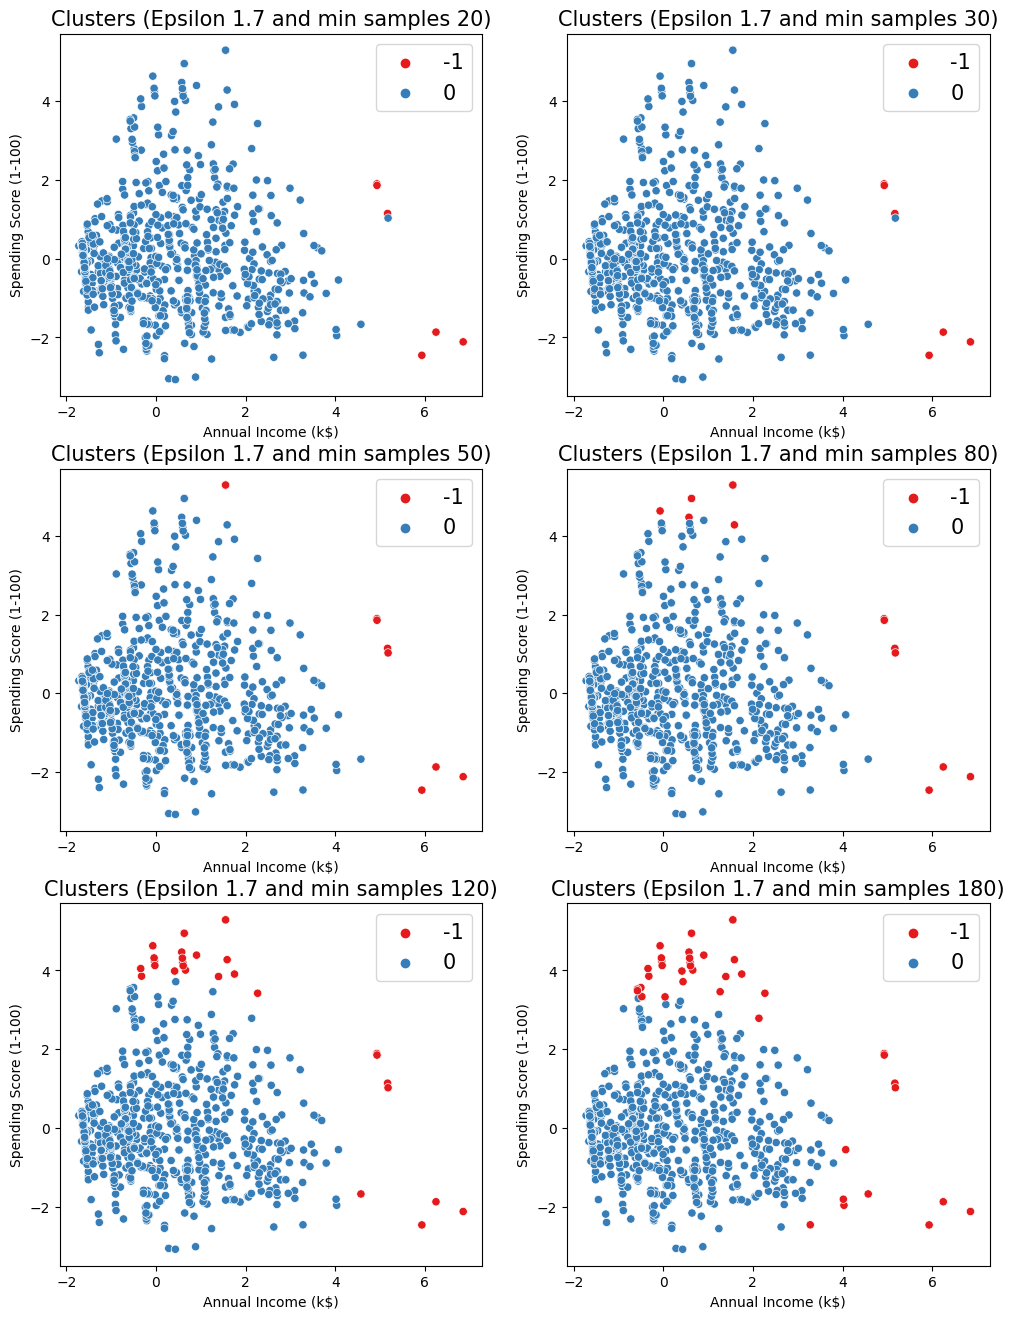

In [ ]:
from sklearn.cluster import DBSCAN
eps_value = 1.7
test_samples = [20,30,50,80,120,180]
len_test_samples = len(test_samples)
plot_x = int(len_test_samples/2)
plot_y = int(len(test_samples)/plot_x)

fig,ax = plt.subplots(plot_x,plot_y,figsize=(12,16))
colorArray = [
    (0.2, 0.4, 0.6),
    (0.8, 0.1, 0.3),
    (0.5, 0.7, 0.2),
    (0.9, 0.5, 0.1),
    (0.3, 0.6, 0.9),
    (0.7, 0.2, 0.8),
    (0.1, 0.9, 0.4),
    (0.4, 0.8, 0.7),
    (0.6, 0.3, 0.5),
    (0.2, 0.5, 0.8)
]
for i in range(len_test_samples):
  row = i // plot_y
  col = i % plot_y
  dbscan = DBSCAN(eps=eps_value, min_samples = test_samples[i])
  y_dbscan = dbscan.fit_predict(X_pca_2)
  sns.scatterplot(data = X_pca_2, x = X_pca_2[:,0], y = X_pca_2[:,1], hue = y_dbscan, palette = 'Set1', ax=ax[row, col])
  ax[row, col].set_title(f'Clusters (Epsilon {eps_value} and min samples {test_samples[i]})', fontsize = 15)
  ax[row, col].set_xlabel('Annual Income (k$)', fontsize = 10)
  ax[row, col].set_ylabel('Spending Score (1-100)', fontsize = 10)
  ax[row, col].legend(fontsize = 15)
plt.show()

# Perform DBSCAN clustering using two principal components, most of the eplsilon andd sample combinations with only result in 1 clusters only, as the PCA values is only 0.43, which is not high enough